In [52]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, timedelta
#-------------------------------
import warnings
warnings.simplefilter('ignore')
from matplotlib.backends.backend_pdf import PdfPages

In [122]:
car_df = pd.read_csv("Road Accident Data.csv")

In [123]:
car_df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [124]:
df = car_df.copy()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [126]:
df.isnull().sum().sum()

310474

In [127]:
df.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [128]:
df.drop(columns="Carriageway_Hazards", inplace=True)

In [129]:
df = df.dropna()

In [130]:
df.shape

(300495, 20)

In [131]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [132]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fetal', 'Fatal'], dtype=object)

In [133]:
df['Accident_Severity'].replace('Fetal', 'Fatal', inplace=True)
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [134]:
df.drop(columns=['Latitude', 'Longitude','Police_Force'], inplace=True)

In [135]:
df.drop(columns="Junction_Detail", inplace=True)

In [136]:
df.drop(columns="Junction_Control", inplace=True)

In [137]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Accident_Severity,Light_Conditions,Local_Authority_(District),Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Serious,Daylight,Kensington and Chelsea,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Serious,Daylight,Kensington and Chelsea,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Slight,Daylight,Kensington and Chelsea,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Serious,Daylight,Kensington and Chelsea,1,2,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Serious,Darkness - lights lit,Kensington and Chelsea,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [138]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'] , format="%m/%d/%Y")
df['Accident Date']

0        2021-01-01
1        2021-01-05
2        2021-01-04
3        2021-01-05
4        2021-01-06
            ...    
307968   2022-02-18
307969   2022-02-21
307970   2022-02-23
307971   2022-02-23
307972   2022-02-28
Name: Accident Date, Length: 300495, dtype: datetime64[ns]

In [139]:
#df['Time']= df['Time'].str.split(':').str[0]
#df['Time'].head()

In [140]:
df.to_csv('car_accidents_uk.csv', index=False)

In [141]:
df.head(5)

,Accident_Index,Accident Date,Day_of_Week,Accident_Severity,Light_Conditions,Local_Authority_(District),Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Serious,Daylight,Kensington and Chelsea,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Serious,Daylight,Kensington and Chelsea,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Slight,Daylight,Kensington and Chelsea,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Serious,Daylight,Kensington and Chelsea,1,2,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Serious,Darkness - lights lit,Kensington and Chelsea,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [142]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300495 entries, 0 to 307972
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              300495 non-null  object        
 1   Accident Date               300495 non-null  datetime64[ns]
 2   Day_of_Week                 300495 non-null  object        
 3   Accident_Severity           300495 non-null  object        
 4   Light_Conditions            300495 non-null  object        
 5   Local_Authority_(District)  300495 non-null  object        
 6   Number_of_Casualties        300495 non-null  int64         
 7   Number_of_Vehicles          300495 non-null  int64         
 8   Road_Surface_Conditions     300495 non-null  object        
 9   Road_Type                   300495 non-null  object        
 10  Speed_limit                 300495 non-null  int64         
 11  Time                        300495 non-null 

# 1. Number of accidents by 'Vehicle_Type'

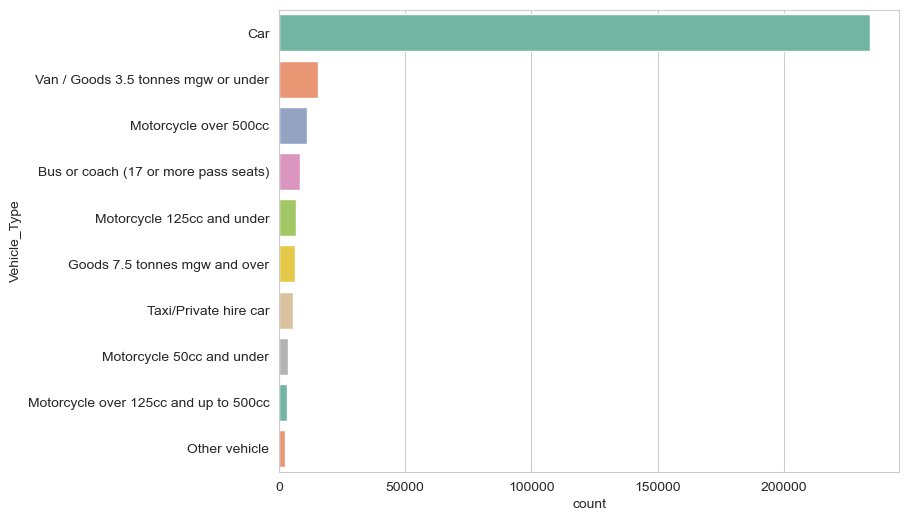

In [149]:
top_types = df['Vehicle_Type'].value_counts().nlargest(10).index

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df[df['Vehicle_Type'].isin(top_types)],
    y='Vehicle_Type',
    order=top_types,
    palette='Set2'
)

# 2. Number of accidents by 'Urban vs Rural Areas'

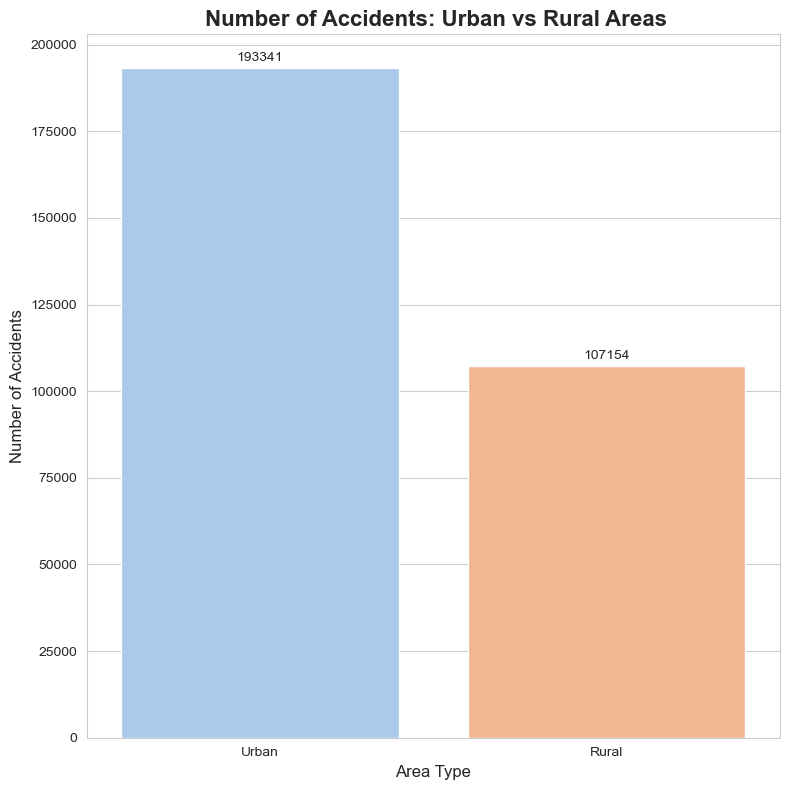

In [155]:
area_counts = df['Urban_or_Rural_Area'].value_counts()

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

# Bar plot
ax = sns.barplot(
    x=area_counts.index,
    y=area_counts.values,
    palette='pastel'
)

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)

# Customize labels and layout
plt.title(' Number of Accidents: Urban vs Rural Areas', fontsize=16, weight='bold')
plt.xlabel('Area Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Number of accidents by 'Speed_limit'

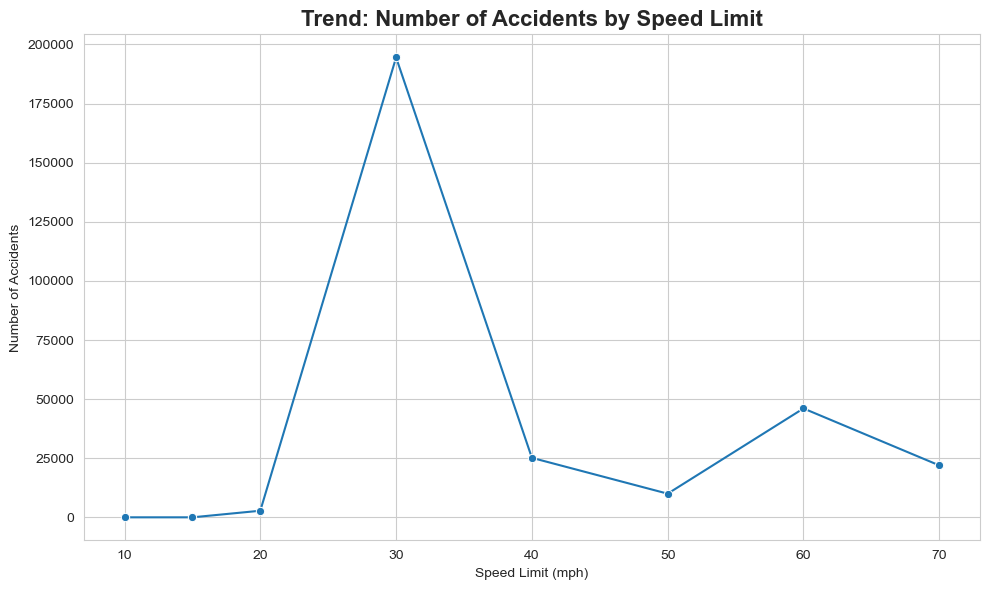

In [163]:
accidents_by_speed = df['Speed_limit'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_speed.index, y=accidents_by_speed.values, marker='o')

plt.title('Trend: Number of Accidents by Speed Limit', fontsize=16, weight='bold')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Number of accidents by 'Day_of_Week'

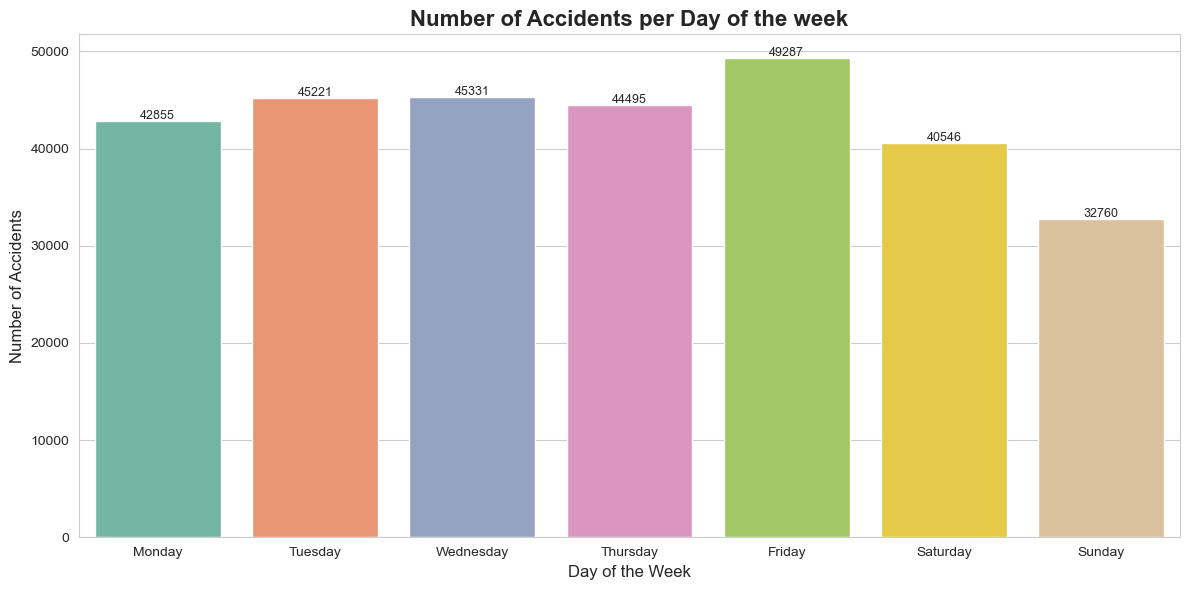

In [144]:
# Εξασφάλιση σωστής σειράς των ημερών
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ομαδοποίηση
accidents_per_day = df['Day_of_Week'].value_counts().reindex(day_order)

# Σχεδίαση
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=accidents_per_day.index,
    y=accidents_per_day.values,
    palette=sns.color_palette("Set2", n_colors=7)  # ίδια παλέτα
)

# Προσθήκη αριθμών πάνω από τις μπάρες
for i, value in enumerate(accidents_per_day.values):
    ax.text(i, value + 200, str(value), ha='center', fontsize=9)

# Ετικέτες και τίτλοι
plt.title('Number of Accidents per Day of the week', fontsize=16, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 5. Number of accidents by 'Hour'

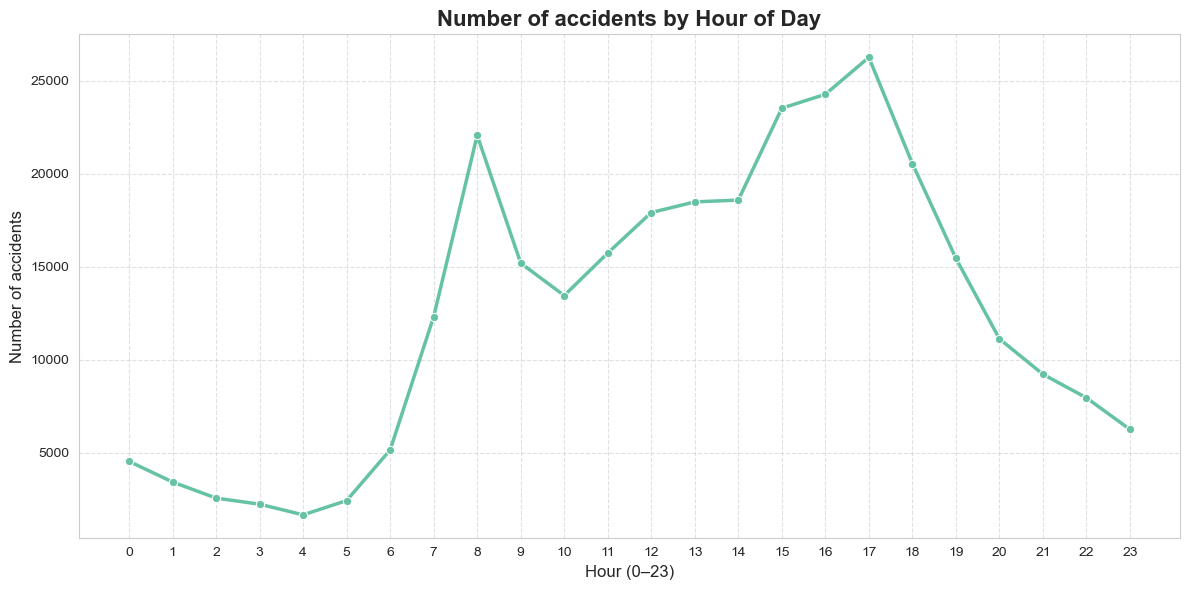

In [160]:
# Βεβαιώσου ότι έχεις εξάγει την ώρα
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

# Αφαίρεση NaNs
df_hourly = df.dropna(subset=['Hour'])

# Υπολογισμός πλήθους ατυχημάτων ανά ώρα
accidents_per_hour = df_hourly['Hour'].value_counts().sort_index()

# Σχεδίαση lineplot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(
    x=accidents_per_hour.index,
    y=accidents_per_hour.values,
    color=sns.color_palette("Set2")[0],  # Πρώτο χρώμα από την παλέτα Set2
    marker='o',
    linewidth=2.5
)

# Ετικέτες και τίτλος
plt.title('Number of accidents by Hour of Day', fontsize=16, weight='bold')
plt.xlabel('Hour (0–23)', fontsize=12)
plt.ylabel('Number of accidents', fontsize=12)
plt.xticks(range(0, 24))  # Βεβαιώνει ότι εμφανίζονται όλες οι ώρες

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

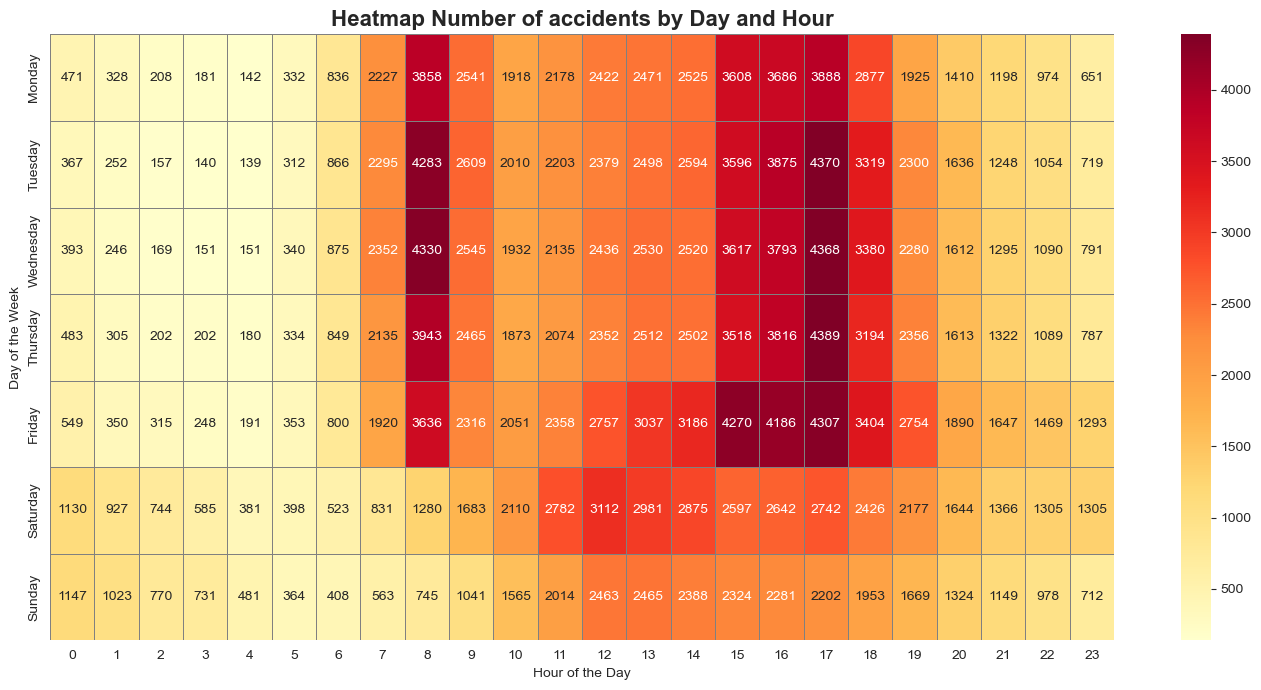

In [161]:
# Αν δεν έχεις ήδη την ώρα ως αριθμό
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

# Δημιουργία pivot table: γραμμές = ημέρες, στήλες = ώρες
pivot = df.pivot_table(index='Day_of_Week', columns='Hour', values='Accident_Index', aggfunc='count').fillna(0)

# Προαιρετικά: Ταξινόμηση των ημερών της εβδομάδας σωστά
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(days_order)

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.heatmap(
    pivot,
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='.0f'
)

plt.title('Heatmap Number of accidents by Day and Hour', fontsize=16, weight='bold')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()

# 6. Number of accidents per 'Light Condition'

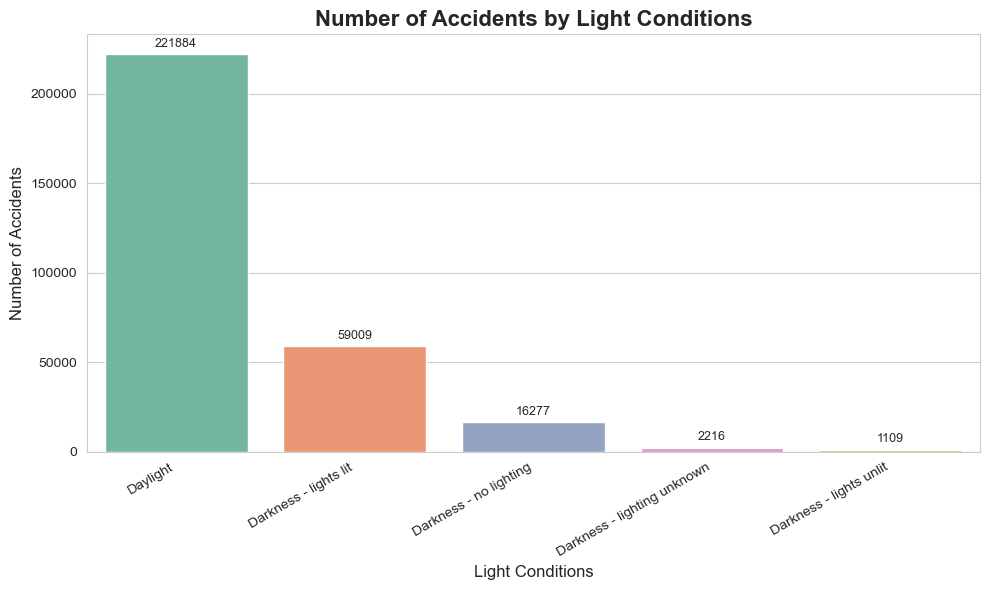

In [162]:
# Count number of accidents per Light Condition
light_counts = df['Light_Conditions'].value_counts()

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(
    x=light_counts.index,
    y=light_counts.values,
    palette='Set2'
)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

# Customize labels and title
plt.title('Number of Accidents by Light Conditions', fontsize=16, weight='bold')
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

plt.show()

# 7. Number of accidents per 'Weather_Conditions'

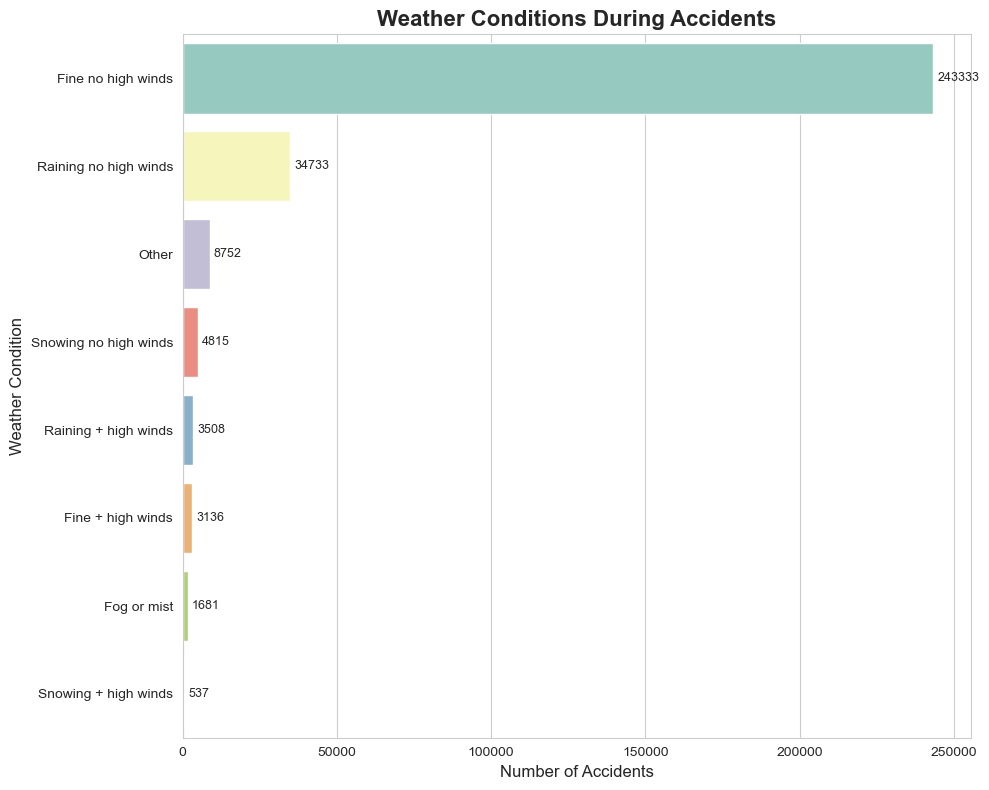

In [164]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # taller for better spacing

ax = sns.countplot(
    data=df,
    y='Weather_Conditions',
    order=df['Weather_Conditions'].value_counts().index,
    palette='Set3'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.title('Weather Conditions During Accidents', fontsize=16, weight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)

plt.tight_layout()
plt.show()

# 8. Number of accidents by 'Road_Surface_Conditions'

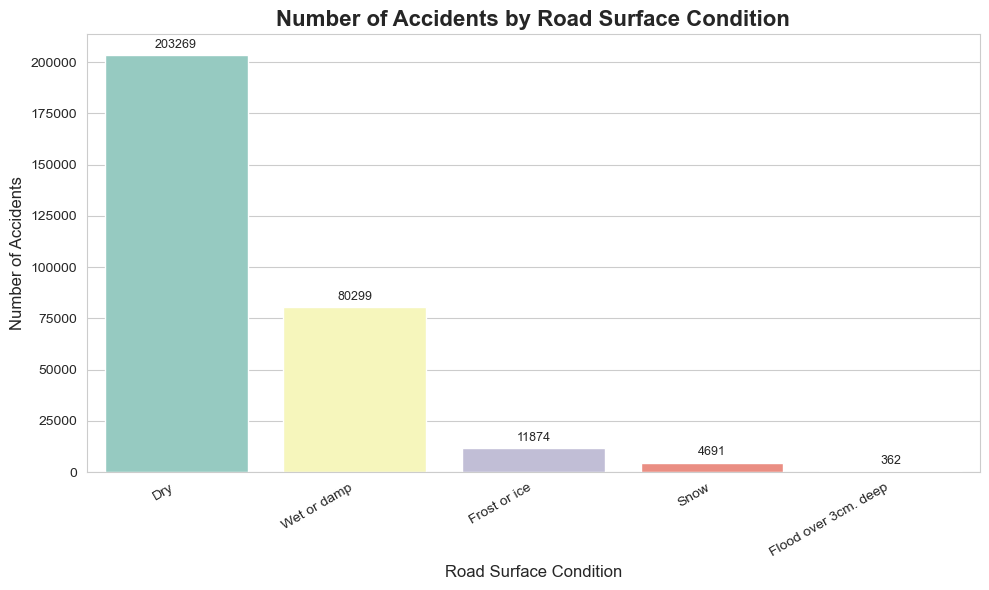

In [169]:
df_clean = df[df['Road_Surface_Conditions'].notna()]

#Υπολογισμός counts
surface_counts = df_clean['Road_Surface_Conditions'].value_counts()

#Γραφικό
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x=surface_counts.index,
    y=surface_counts.values,
    palette='Set3'
)

#Ετικέτες στις μπάρες
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

#Προσαρμογές τίτλων
plt.title('Number of Accidents by Road Surface Condition', fontsize=16, weight='bold')
plt.xlabel('Road Surface Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# 9. Number of accidents by 'Road_Surface_Conditions'

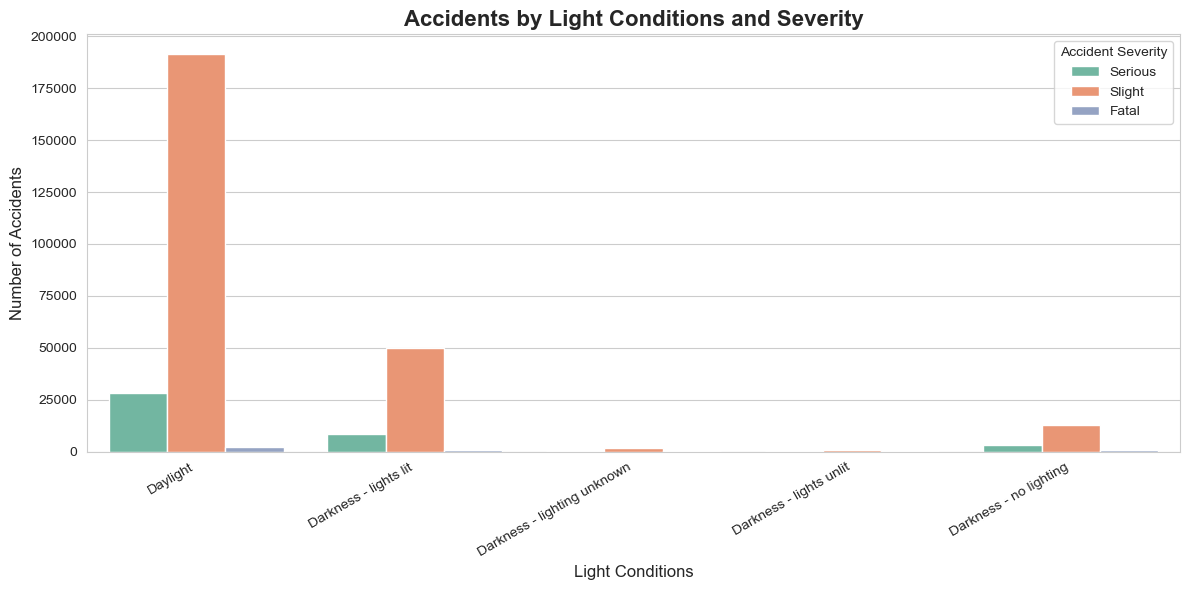

In [171]:
palette = sns.color_palette("Set2", n_colors=df['Accident_Severity'].nunique())

#Διάγραμμα
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    x='Light_Conditions',
    hue='Accident_Severity',
    palette=palette
)

#Ρύθμιση τίτλων και αισθητικής
plt.title('Accidents by Light Conditions and Severity', fontsize=16, weight='bold')
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()

# 10. Number of accidents by 'Light Condition'

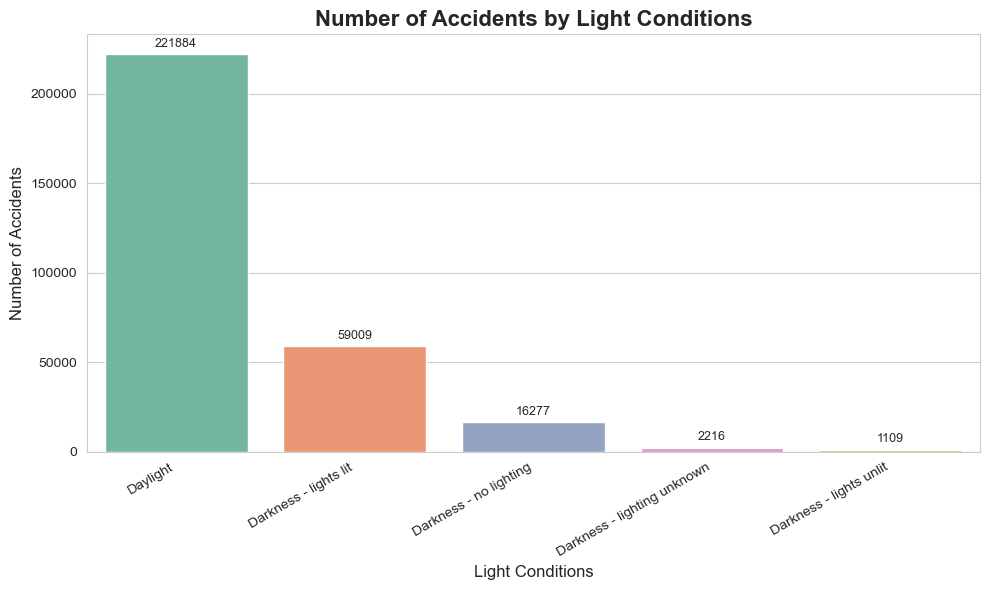

In [172]:
# Count number of accidents per Light Condition
light_counts = df['Light_Conditions'].value_counts()

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(
    x=light_counts.index,
    y=light_counts.values,
    palette='Set2'
)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

# Customize labels and title
plt.title('Number of Accidents by Light Conditions', fontsize=16, weight='bold')
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

plt.show()

# 10. Number of accidents by 'Light Condition and Severity'

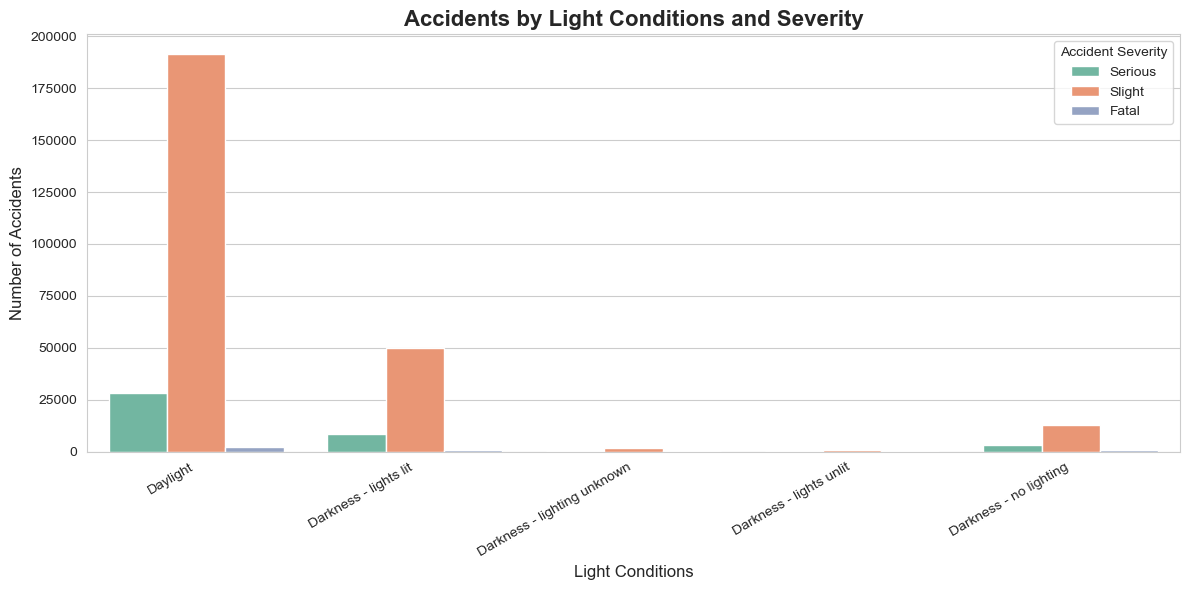

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

#Ορισμός χρωμάτων για το hue (3 τιμές για 3 severity levels)
palette = sns.color_palette("Set2", n_colors=df['Accident_Severity'].nunique())

#Διάγραμμα
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    x='Light_Conditions',
    hue='Accident_Severity',
    palette=palette
)

#Ρύθμιση τίτλων και αισθητικής
plt.title('Accidents by Light Conditions and Severity', fontsize=16, weight='bold')
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()

# 11. Number of accidents by 'Weather Conditions and Severity'

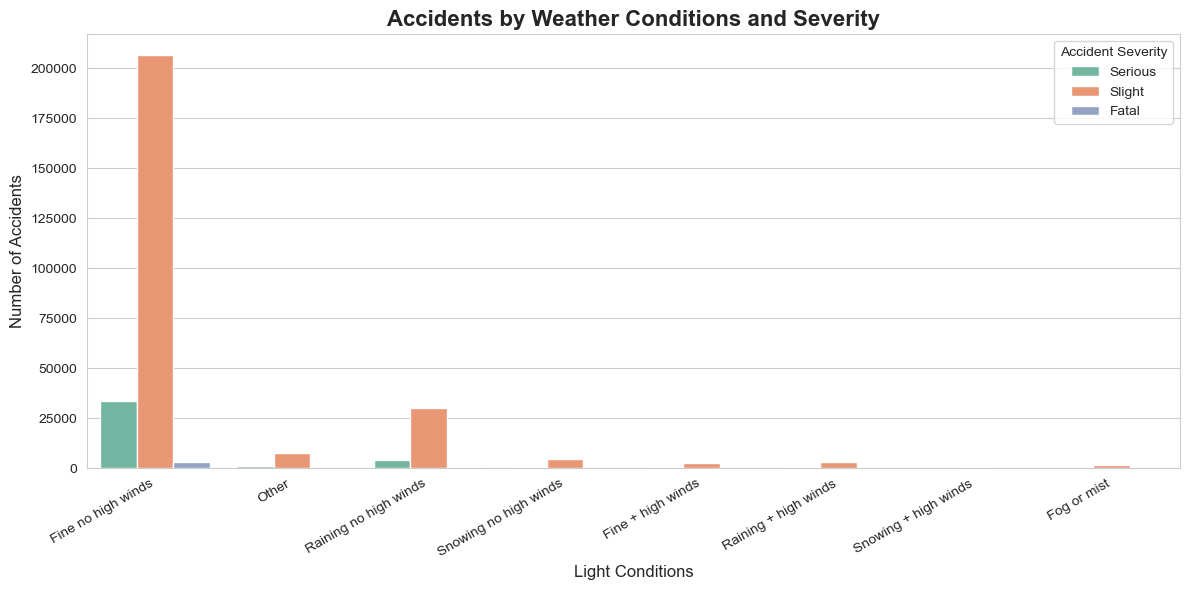

In [175]:
palette = sns.color_palette("Set2", n_colors=df['Accident_Severity'].nunique())

# Διάγραμμα
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    x='Weather_Conditions',
    hue='Accident_Severity',
    palette=palette
)

# Ρύθμιση τίτλων και αισθητικής
plt.title('Accidents by Weather Conditions and Severity', fontsize=16, weight='bold')
plt.xlabel('Light Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Accident Severity')
plt.tight_layout()
plt.show()

# bonus

In [177]:
car_df = pd.read_csv("Road Accident Data.csv")

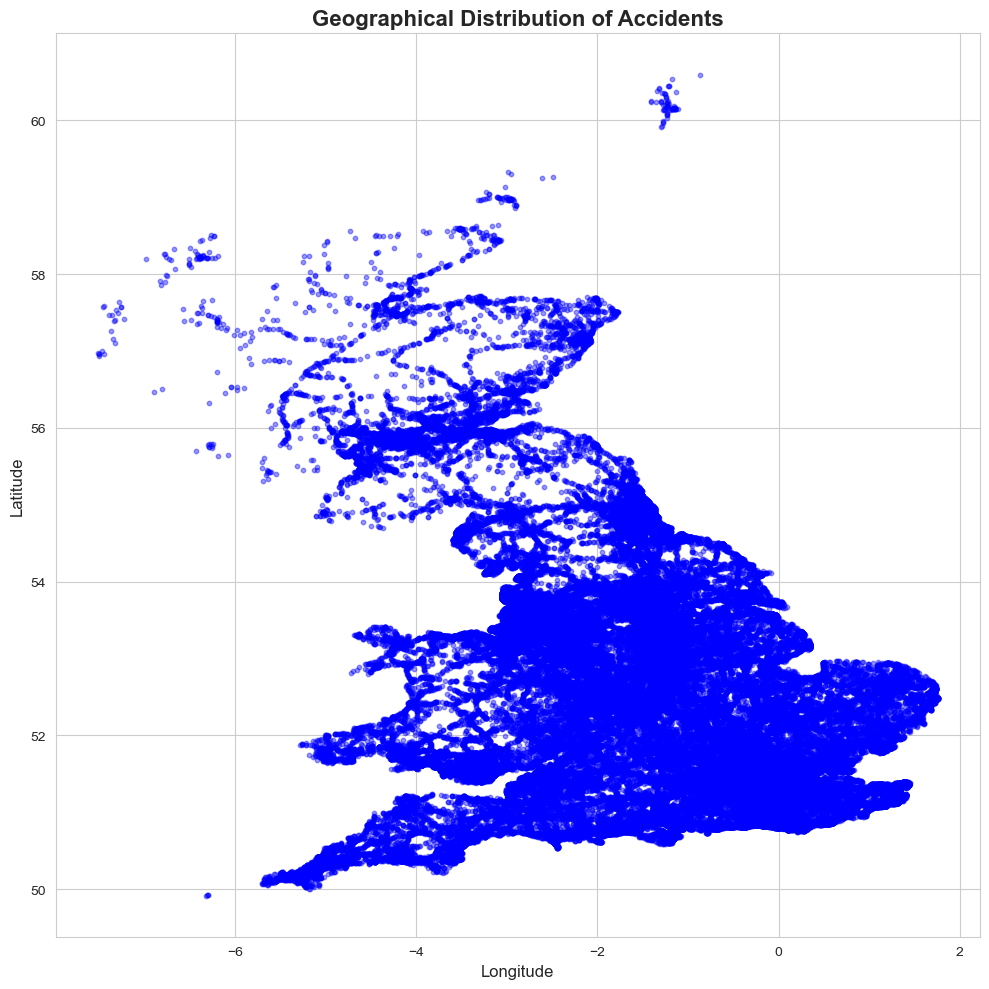

In [180]:
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")

plt.scatter(
    car_df['Longitude'], 
    car_df['Latitude'], 
    alpha=0.4,  # για να φαίνονται οι πυκνώσεις
    s=10,       # μέγεθος σημείων
    c='blue'
)

plt.title('Geographical Distribution of Accidents', fontsize=16, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.tight_layout()
plt.show()

In [185]:
df.groupby('Accident_Severity')['Number_of_Casualties'].sum().sort_values(ascending=False).reset_index()

,Accident_Severity,Number_of_Casualties
0,Slight,343073
1,Serious,58432
2,Fatal,7003


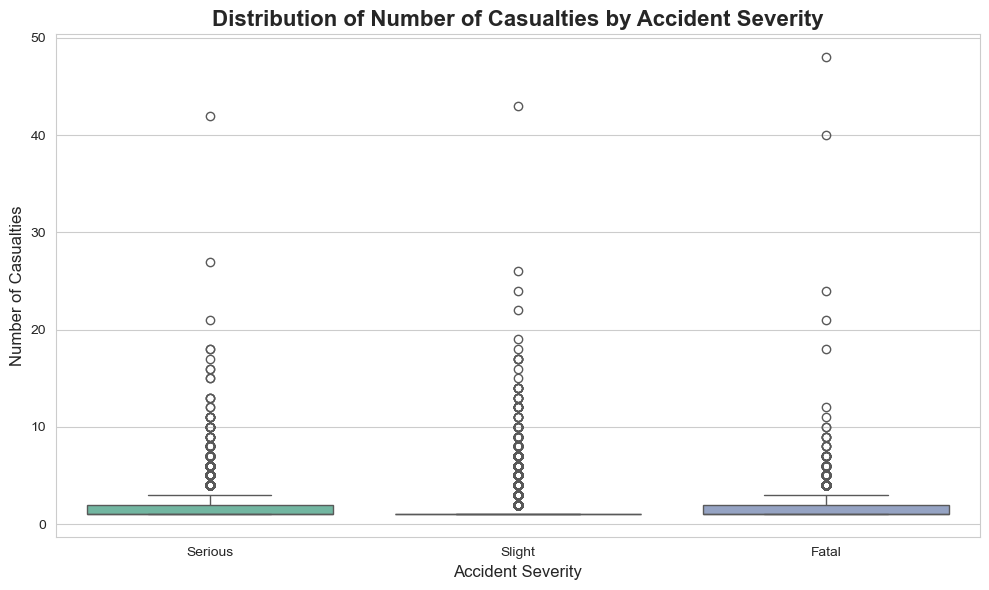

In [181]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    data=df,
    x='Accident_Severity',
    y='Number_of_Casualties',
    palette='Set2'
)

plt.title('Distribution of Number of Casualties by Accident Severity', fontsize=16, weight='bold')
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)

plt.tight_layout()
plt.show()
